In [1]:
#Importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Data Preprocessing

#Training image preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 70295 files belonging to 38 classes.


Validation image Preprocessing

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[148.5  141.5  148.5 ]
   [157.75 150.75 157.75]
   [167.75 160.75 167.75]
   ...
   [178.25 175.25 184.25]
   [166.25 163.25 172.25]
   [174.25 171.25 180.25]]

  [[155.75 148.75 155.75]
   [152.   145.   152.  ]
   [156.   149.   156.  ]
   ...
   [172.   169.   178.  ]
   [180.5  177.5  186.5 ]
   [166.25 163.25 172.25]]

  [[152.5  145.5  152.5 ]
   [143.25 136.25 143.25]
   [146.   139.   146.  ]
   ...
   [188.25 185.25 194.25]
   [174.75 171.75 180.75]
   [180.75 177.75 186.75]]

  ...

  [[114.75 101.75 108.75]
   [138.25 125.25 132.25]
   [130.5  117.5  124.5 ]
   ...
   [142.5  131.5  139.5 ]
   [116.   105.   113.  ]
   [105.    94.   102.  ]]

  [[125.25 112.25 119.25]
   [106.75  93.75 100.75]
   [129.   116.   123.  ]
   ...
   [122.5  111.5  119.5 ]
   [123.5  112.5  120.5 ]
   [105.5   94.5  102.5 ]]

  [[118.75 105.75 112.75]
   [142.25 129.25 136.25]
   [128.5  115.5  122.5 ]
   ...
   [120.25 109.25 117.25]
   [124.25 113.25 121.25]
   [118.25 107.25 11

Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

model=Sequential()

#Building Convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.25))  #To Avoid overfitting
model.add(Flatten())

model.add(Dense(units=1024,activation='relu'))

model.add(Dropout(0.4))
#Output Layer
model.add(Dense(units=38,activation='softmax'))


Compiling Model

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       


                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 conv2d_5 

Model Training

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 370s 160ms/step - loss: 1.5384 - accuracy: 0.5515 - val_loss: 0.5435 - val_accuracy: 0.8321
Epoch 2/10
2197/2197 [==============================] - 277s 126ms/step - loss: 0.5169 - accuracy: 0.8393 - val_loss: 0.3095 - val_accuracy: 0.9027
Epoch 3/10
2197/2197 [==============================] - 273s 124ms/step - loss: 0.3052 - accuracy: 0.9020 - val_loss: 0.2130 - val_accuracy: 0.9304
Epoch 4/10
2197/2197 [==============================] - 268s 122ms/step - loss: 0.2093 - accuracy: 0.9318 - val_loss: 0.2494 - val_accuracy: 0.9203
Epoch 5/10
2197/2197 [==============================] - 267s 121ms/step - loss: 0.1554 - accuracy: 0.9496 - val_loss: 0.1662 - val_accuracy: 0.9472
Epoch 6/10
2197/2197 [==============================] - 268s 122ms/step - loss: 0.1210 - accuracy: 0.9600 - val_loss: 0.1378 - val_accuracy: 0.9585
Epoch 7/10
2197/2197 [==============================] - 308s 140ms/step - loss: 0.0944 - accuracy: 0.9691 - val_

Model Evaluation

In [22]:
#Model evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)

print(train_loss,train_acc)

2197/2197 [==============================] - 154s 70ms/step - loss: 0.0269 - accuracy: 0.9909
0.02689487114548683 0.9908955097198486


In [23]:
#Model on validation set
val_loss, val_acc=model.evaluate(validation_set)

550/550 [==============================] - 37s 67ms/step - loss: 0.1245 - accuracy: 0.9660


In [24]:
print(val_loss,val_acc)

0.12453410029411316 0.9660254716873169


Saving Model (Cannot run everytime it will take a lot of time)

In [25]:
model.save("trained_model_one.keras") #keras aur h5 me size ka faraq aara ek 89 mb ka hai aur keras 30mb ka hai

In [26]:
training_history.history

{'loss': [1.5384299755096436,
  0.5168856978416443,
  0.3052252531051636,
  0.20934727787971497,
  0.15537342429161072,
  0.1209813728928566,
  0.0944320484995842,
  0.08112674951553345,
  0.06776124984025955,
  0.06031268462538719],
 'accuracy': [0.551504373550415,
  0.8392915725708008,
  0.9020271897315979,
  0.9318301677703857,
  0.9495981335639954,
  0.9599686861038208,
  0.9691016674041748,
  0.9734262824058533,
  0.9782061576843262,
  0.9807383418083191],
 'val_loss': [0.5435187816619873,
  0.3094817101955414,
  0.21299758553504944,
  0.24944475293159485,
  0.16618327796459198,
  0.13784907758235931,
  0.1568276584148407,
  0.12029530853033066,
  0.10857146978378296,
  0.12453414499759674],
 'val_accuracy': [0.8320623636245728,
  0.9026861190795898,
  0.9304006099700928,
  0.9203277826309204,
  0.9472455978393555,
  0.9584566354751587,
  0.9539608359336853,
  0.9640905857086182,
  0.9676758646965027,
  0.9660254716873169]}

In [27]:
#Recording model history in jason model
import json
with open("training_history_one.json","w") as f:
    json.dump(training_history.history,f)

Accuracy Visualization

In [28]:
epochs=[i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

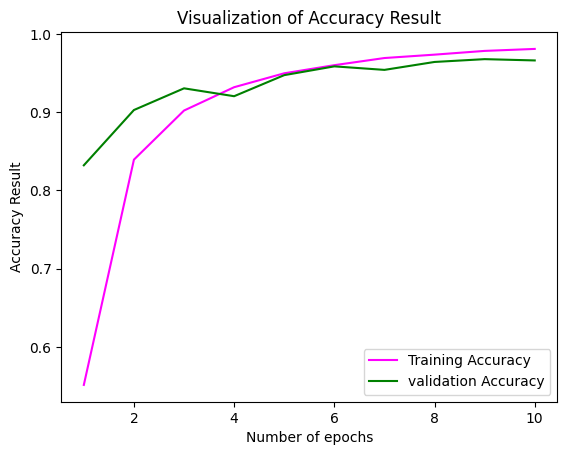

In [29]:
plt.plot(epochs,training_history.history['accuracy'],color='magenta',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='validation Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [30]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred=model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 41s 75ms/step


(array([[9.9999976e-01, 2.4481279e-09, 9.6888192e-12, ..., 3.4133779e-16,
         2.7161564e-15, 6.3060837e-14],
        [9.9998331e-01, 1.3242924e-08, 4.8386634e-10, ..., 1.2984676e-12,
         3.5010495e-13, 1.5392327e-12],
        [1.0000000e+00, 1.0622019e-09, 5.4193577e-12, ..., 4.6493452e-18,
         3.4033038e-15, 1.7360666e-12],
        ...,
        [1.2910533e-09, 8.1381993e-12, 1.7872845e-09, ..., 1.8998773e-10,
         5.9641558e-10, 9.9999833e-01],
        [3.3800307e-09, 1.2517847e-12, 1.2805094e-09, ..., 1.1617504e-09,
         2.1348946e-10, 9.9999952e-01],
        [1.1400383e-14, 2.5908144e-16, 1.4914512e-15, ..., 2.2513506e-16,
         1.0153026e-14, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories= tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories=tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true=tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

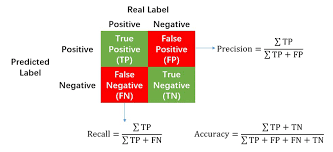

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       1.00      0.94      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.99      0.94      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.99      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.85      0.

In [40]:
cm= confusion_matrix(Y_true, predicted_categories)
cm, cm.shape

(array([[488,   0,   0, ...,   0,   0,   0],
        [  4, 467,   1, ...,   0,   0,   0],
        [  1,   0, 431, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 488,   0,   0],
        [  0,   0,   0, ...,   0, 441,   0],
        [  0,   0,   1, ...,   0,   0, 470]], dtype=int64),
 (38, 38))

Confusion Matrix Visualization

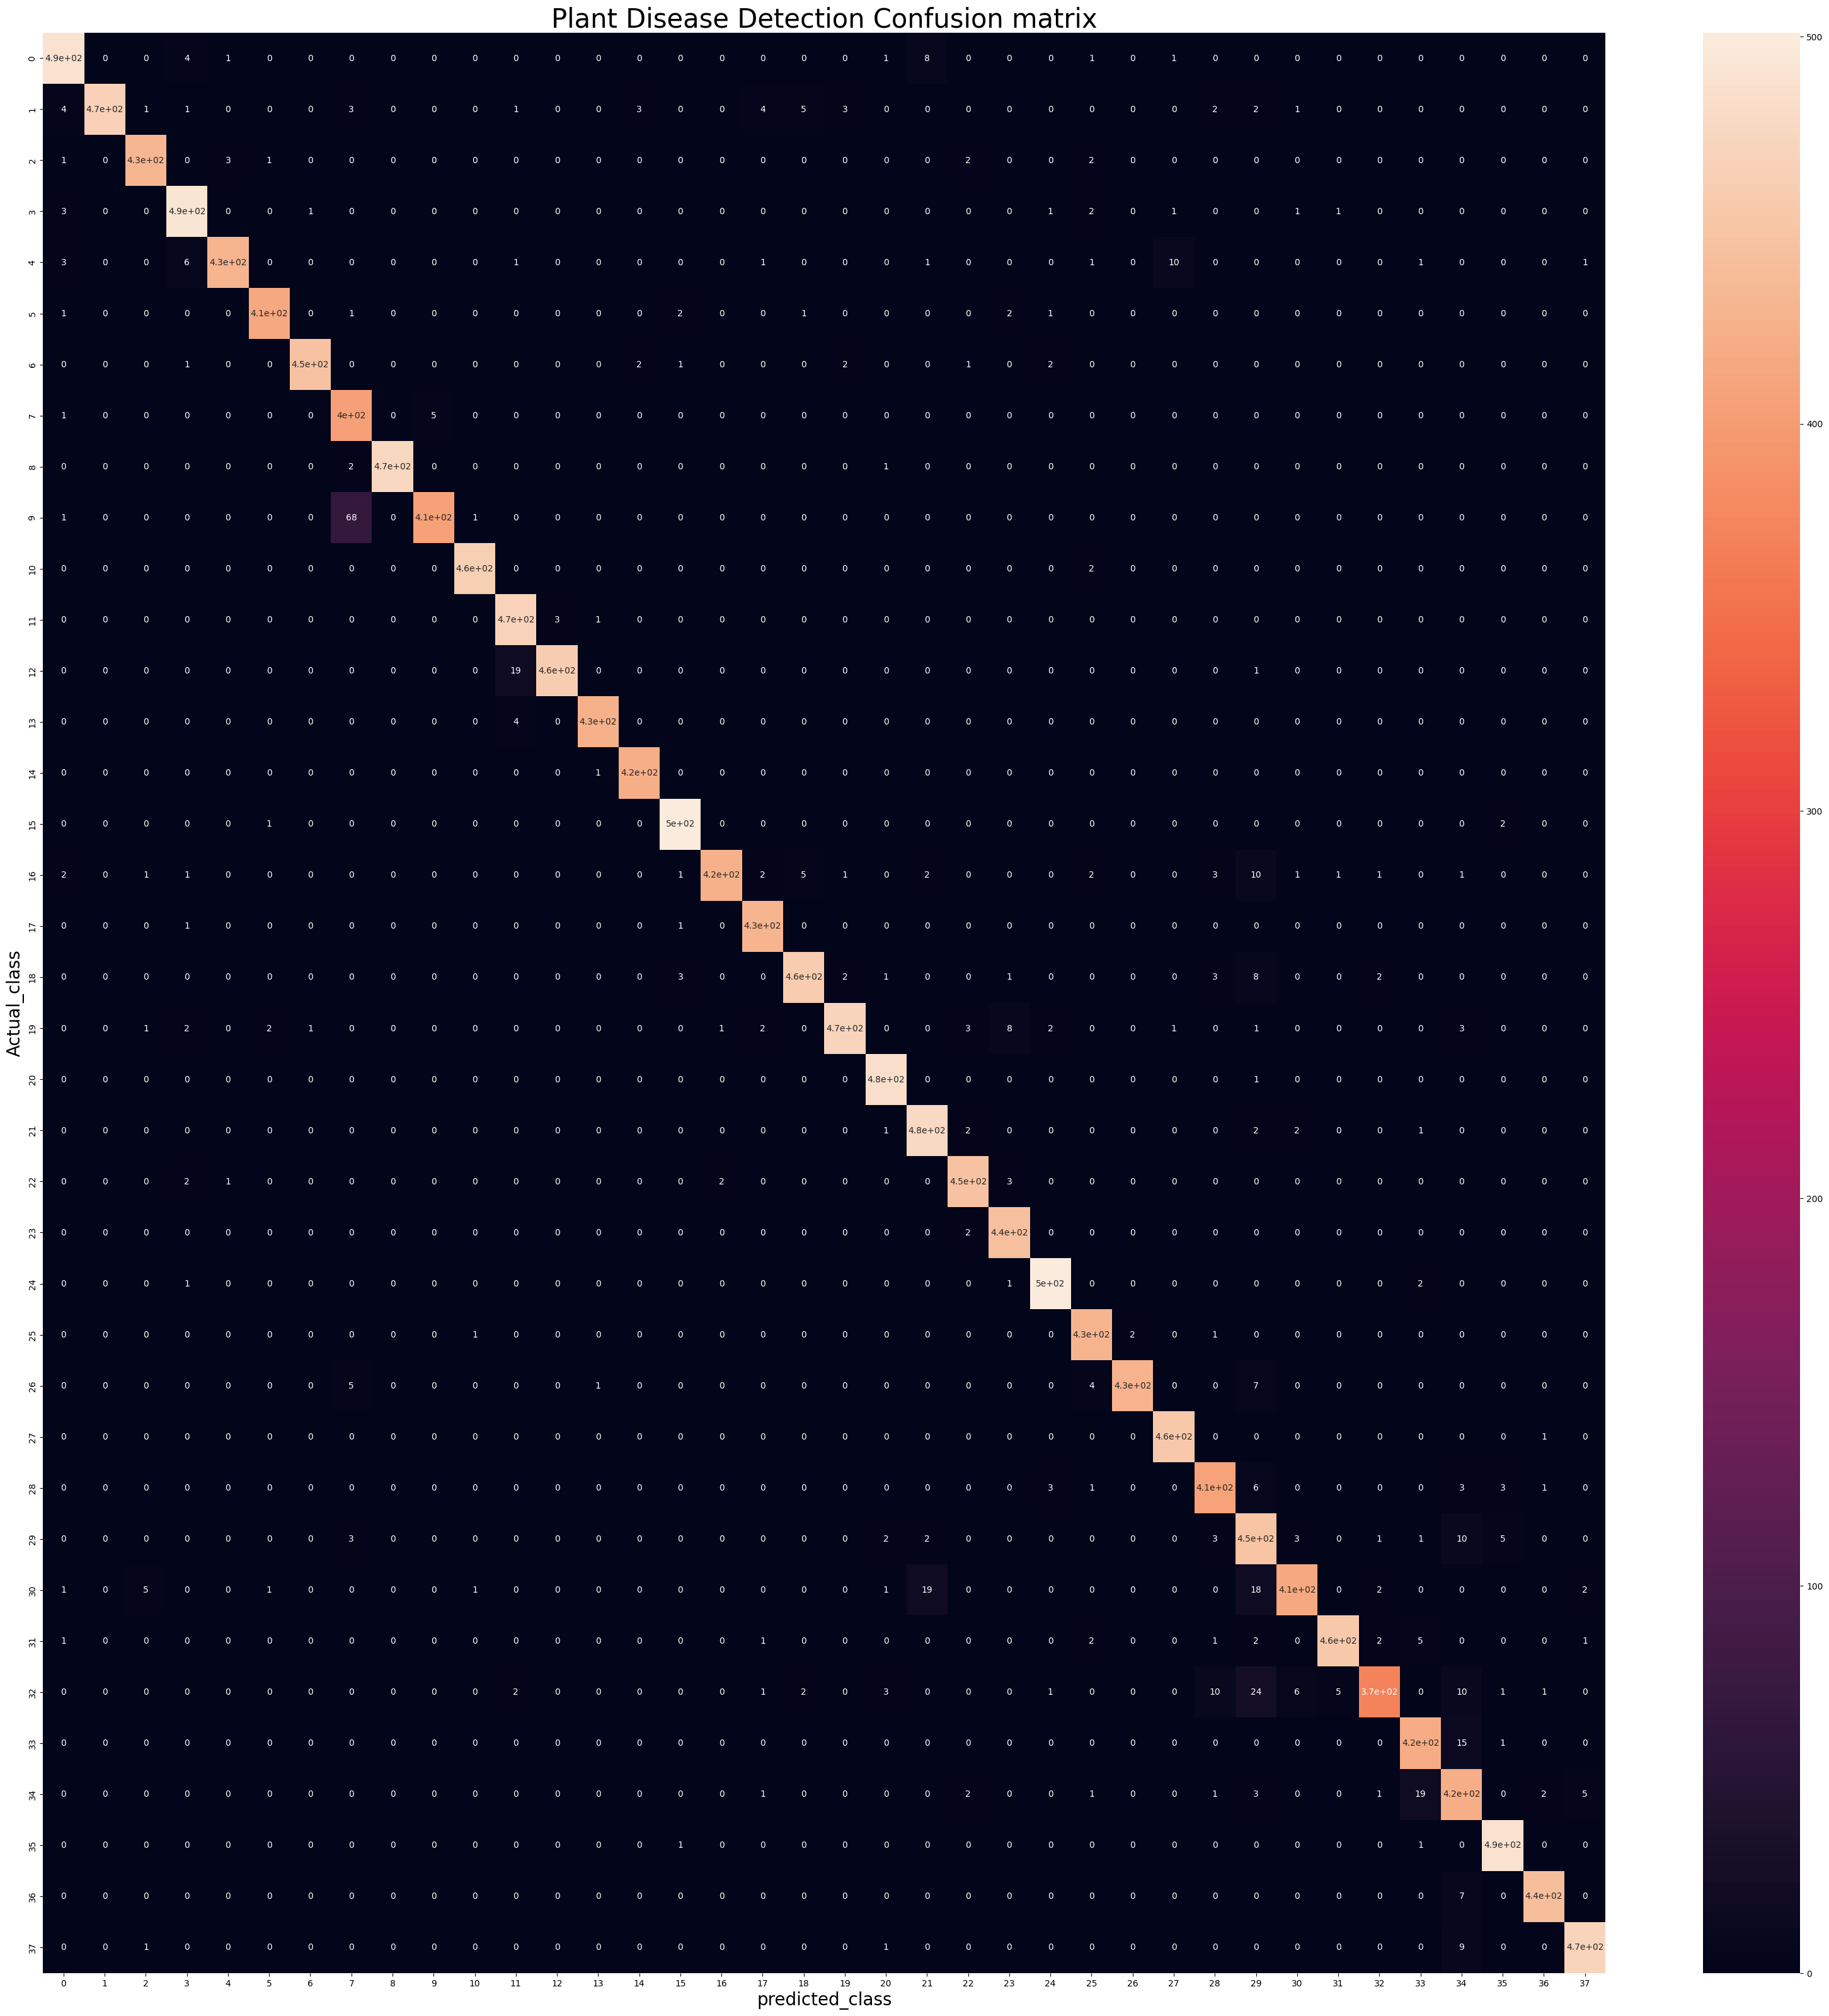

In [41]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("predicted_class", fontsize=20)
plt.ylabel("Actual_class", fontsize=20)
plt.title("Plant Disease Detection Confusion matrix", fontsize=30)
plt.show()